# Daria Bromot - FS500047

## MovieLens Movie Reviews

Import the relevant packages.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

Load the data. For some of the questions below, you will need to merge user data, movie data and review data. You can use Pandas' `merge` or `join` functions.

In [12]:
user_cols = ['id', 'age', 'sex', 'occupation', 'zip_code']
review_cols = ['id', 'movie_id', 'rating', 'time']
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

In [17]:
users=pd.read_csv("ml-100k/u.user",sep='|',names=user_cols)
reviews = pd.read_csv('ml-100k/u.data',sep='\t', names=review_cols)
movies = pd.read_csv('ml-100k/u.item',encoding = 'ISO-8859-1', sep='|', names=movie_cols, usecols=range(5))
movielens=pd.merge(users,reviews)
movielens=pd.merge(movielens,movies)
movielens.head(10)

,id,age,sex,occupation,zip_code,movie_id,rating,time,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
5,60,50,M,healthcare,06472,61,4,883326652,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
6,76,20,M,student,02215,61,4,875028123,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
7,94,26,M,student,71457,61,5,891720761,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
8,144,53,M,programmer,20910,61,3,888106182,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
9,154,25,M,student,53703,61,4,879138657,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


**And now I will show a cool library for preworking with dataset**

I found this in a post on Linkedin.

It can be useful :) 

In [14]:
from pivottablejs import pivot_ui
columns_to = ['age', 'sex', 'rating', 'occupation']

# Select only the desired columns in the DataFrame
movielens_short = movielens[columns_to]
pivot_ui(movielens_short)

## EDA

Show a violin plot with the age distribution for male and female recommders:

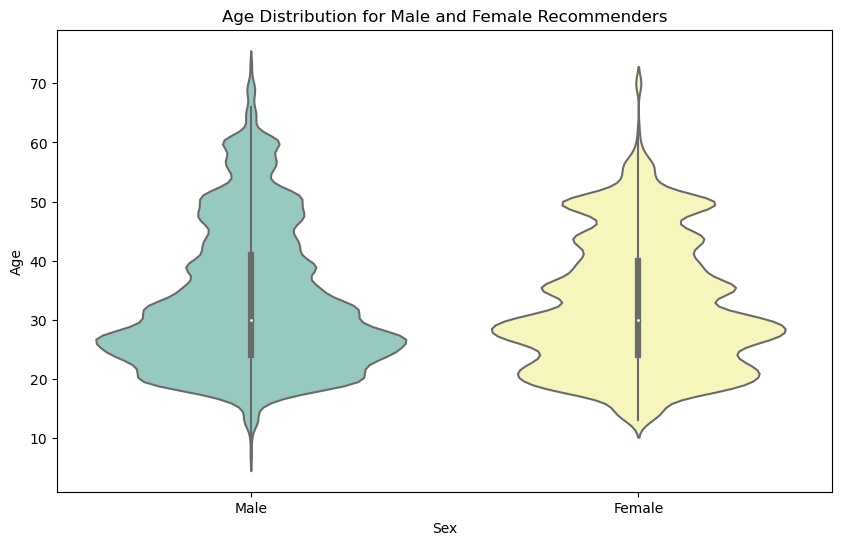

In [15]:
# Filter the data for male and female recommenders
male_recommenders = movielens[movielens['sex'] == 'M']
female_recommenders = movielens[movielens['sex'] == 'F']

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=[male_recommenders['age'], female_recommenders['age']], palette='Set3')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age Distribution for Male and Female Recommenders')
plt.show()

Show a histogram with the number of reviews for each review score. What's the most common score?

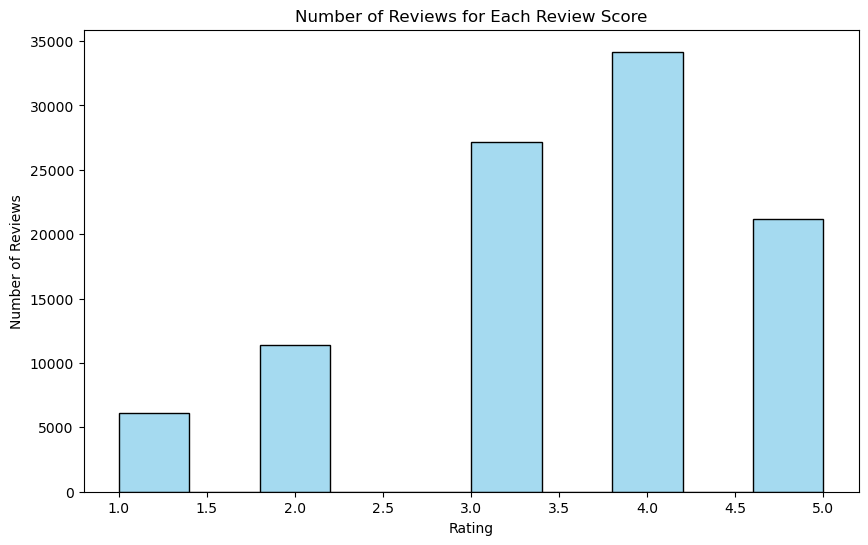

In [16]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=movielens, x='rating', bins=10, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Each Review Score')
plt.show()

In [16]:
most_common_score = movielens['rating'].value_counts().idxmax()
print("The most common score is:", most_common_score)

The most common score is: 4


The file `u.user` contains tab-separated demographic information about the users - user id | age | gender | occupation | zip code.  
Do you see any interesting patterns regarding the age, gender and occupation of users?

Age Distribution: Plotting a histogram to visualize the distribution of users' ages.

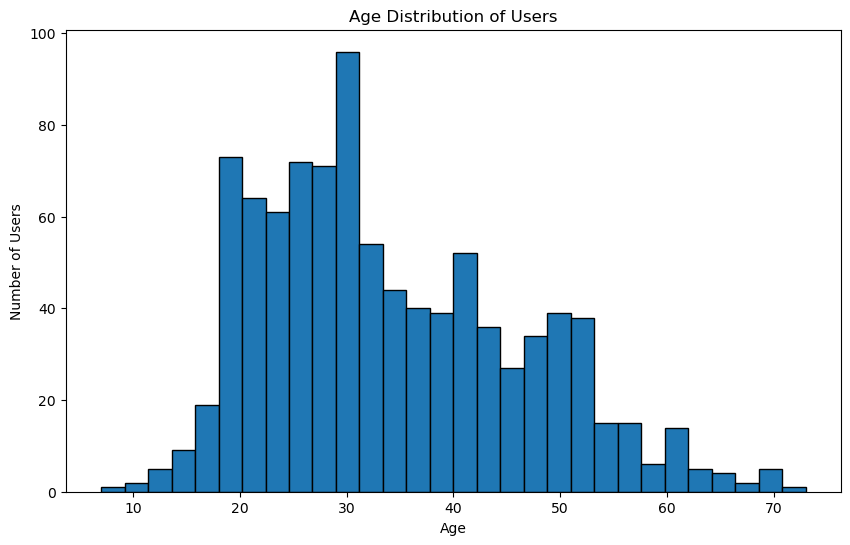

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(users['age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution of Users')
plt.show()

Gender Distribution: Creating a bar plot to display the distribution of users by gender.

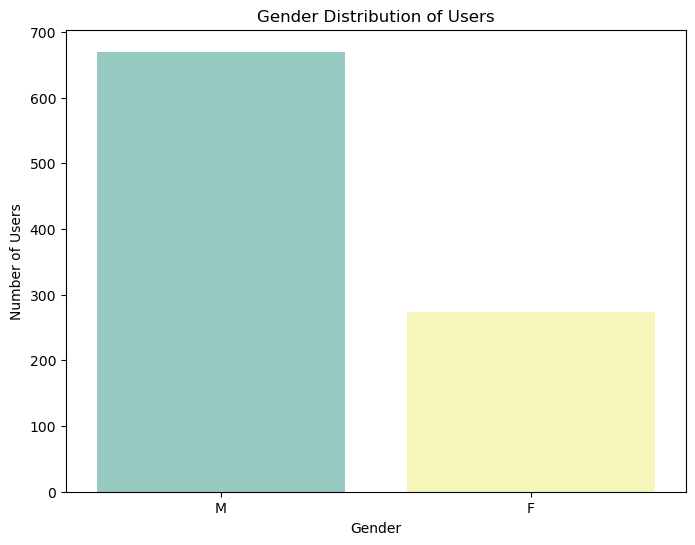

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_counts = users['sex'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set3')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Gender Distribution of Users')
plt.show()


Occupation Distribution: Creating a bar plot to visualize the distribution of users by occupation.

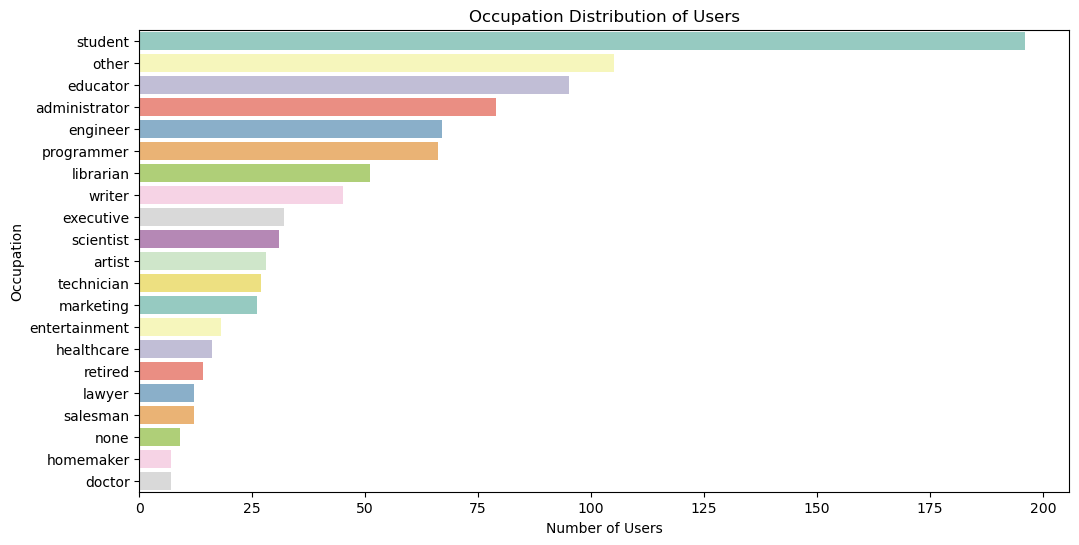

In [33]:
occupation_counts = users['occupation'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette='Set3')
plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.title('Occupation Distribution of Users')
plt.show()


Let's examine the distribution of occupations among different genders. We can create a stacked bar plot to visualize the count of each occupation category based on gender

<Figure size 1200x600 with 0 Axes>

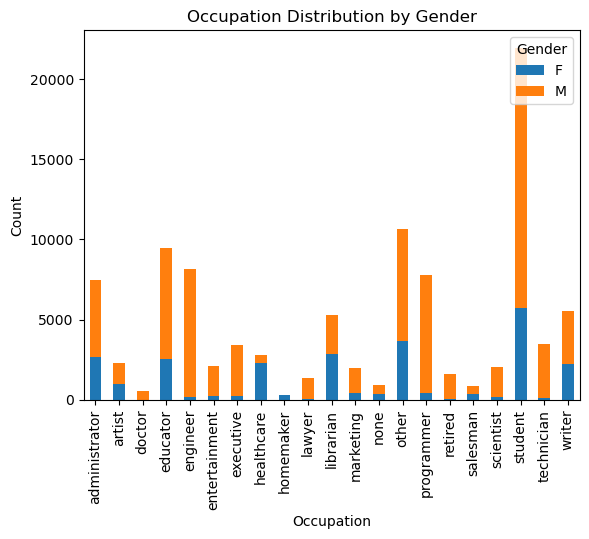

In [37]:
# Count the occurrences of each occupation by gender
occupation_gender_counts = movielens.groupby(['occupation', 'sex']).size().unstack()

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
occupation_gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution by Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()


To analyze the relationship between occupation and age, we can create a box plot to visualize the age distribution for each occupation:

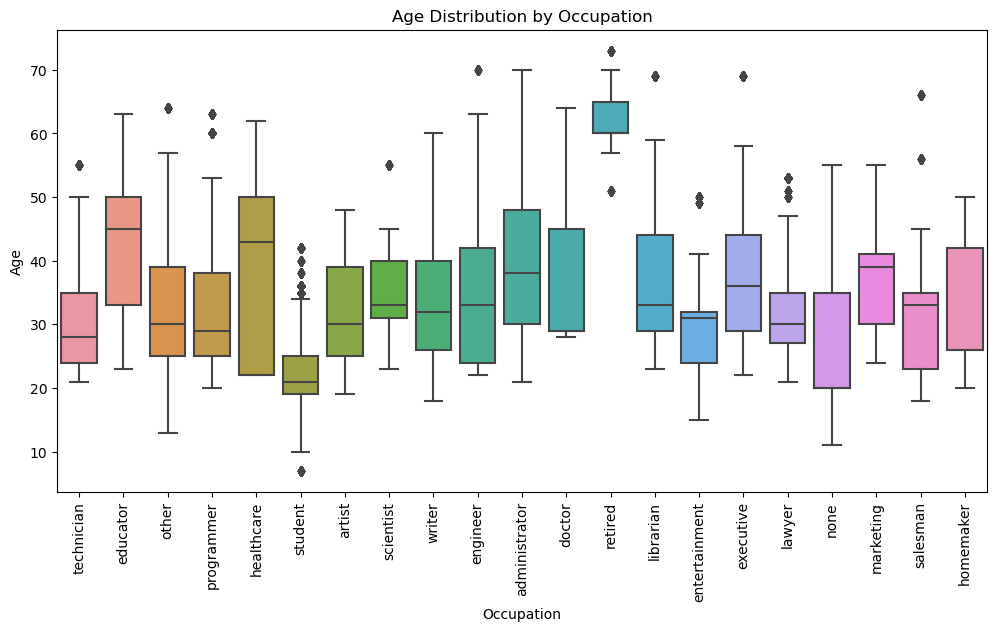

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=movielens, x='occupation', y='age')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Age Distribution by Occupation')
plt.xticks(rotation=90)
plt.show()

On what days and hours do people tend to give reviews?

First, let's convert the 'time' column to a pandas DateTime format and extract the day of the week and hour information:

In [102]:
# Convert 'time' column to DateTime format
movielens['time'] = pd.to_datetime(movielens['time'], unit='s')

# Extract day of the week and hour information
movielens['day_of_week'] = movielens['time'].dt.day_name()
movielens['hour'] = movielens['time'].dt.hour
movielens['month'] = movielens['time'].dt.month

Now that we have the 'day_of_week' and 'hour' columns, we can analyze the distribution of reviews based on these variables. We can create a bar plot to visualize the number of reviews for each day of the week:

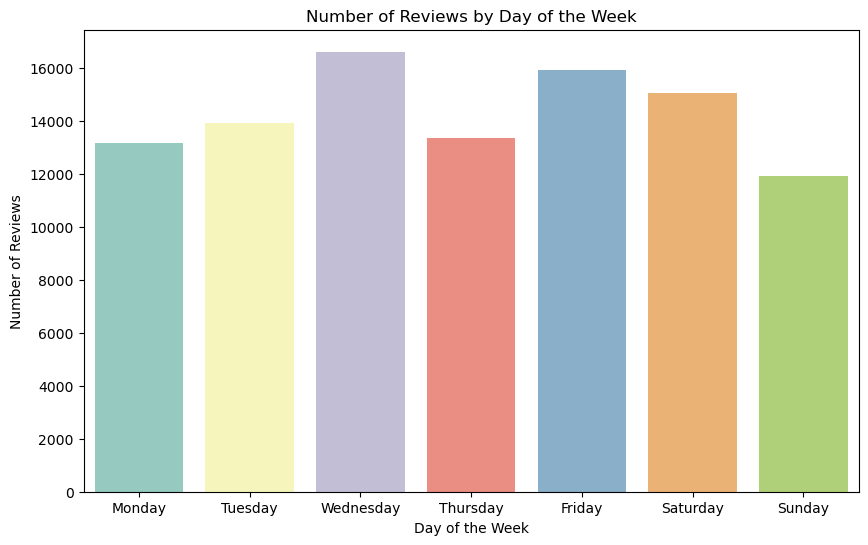

In [103]:
# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count the occurrences of each day of the week
reviews_by_day = movielens['day_of_week'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_by_day.index, y=reviews_by_day.values, order=day_order, palette='Set3')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Day of the Week')
plt.show()


Similarly, we can create another bar plot to visualize the number of reviews for each hour of the day:

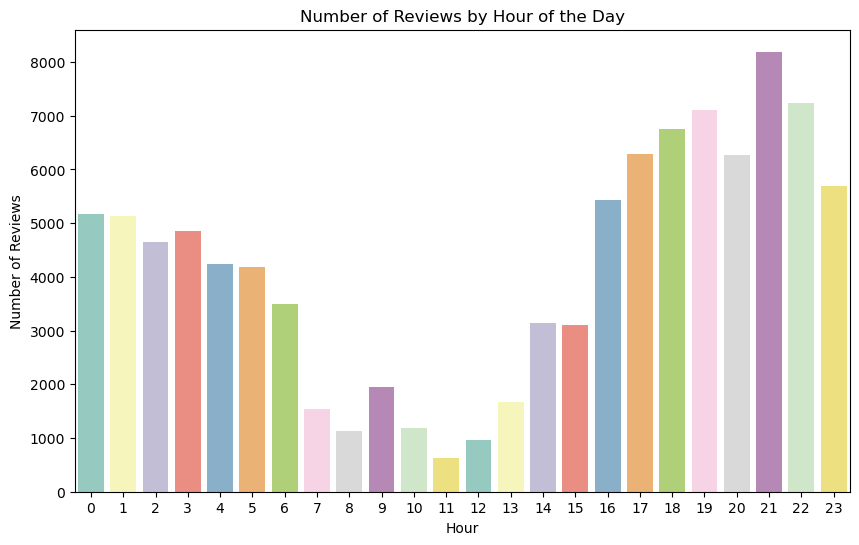

In [44]:
# Count the occurrences of each hour of the day
reviews_by_hour = movielens['hour'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_by_hour.index, y=reviews_by_hour.values, palette='Set3')
plt.xlabel('Hour')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Hour of the Day')
plt.show()


To combine the two plots into a single graph, where the vertical axis represents the time (hours) and the horizontal axis represents the days of the week, we can use a heatmap plot:

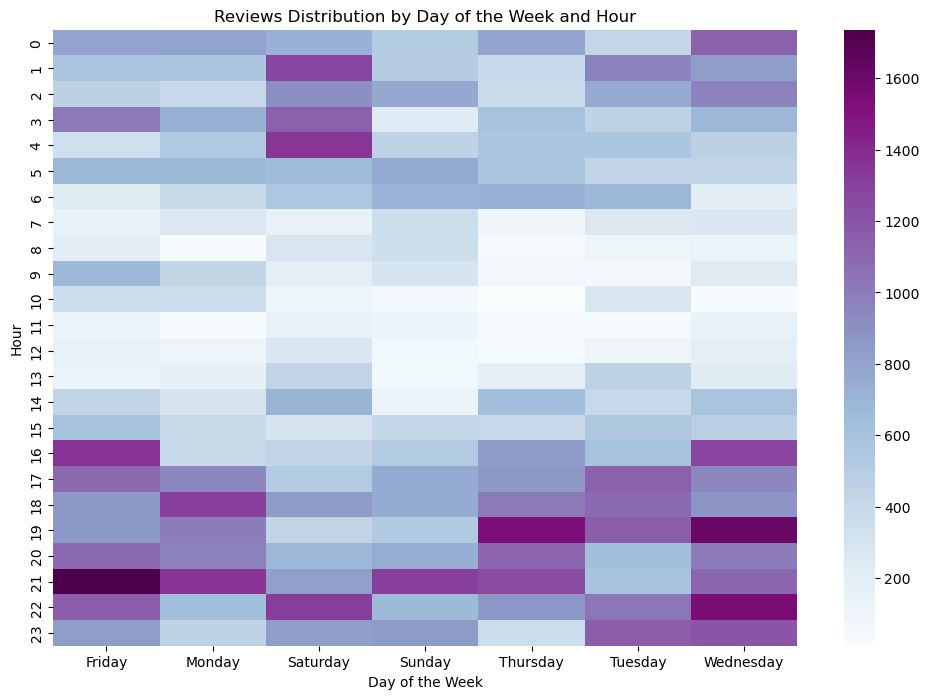

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to aggregate the count of reviews by day of the week and hour
reviews_pivot = movielens.pivot_table(index='hour', columns='day_of_week', values='rating', aggfunc='count')

# Create the heatmap plot
plt.figure(figsize=(12, 8))
sns.heatmap(reviews_pivot, cmap='BuPu')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.title('Reviews Distribution by Day of the Week and Hour')
plt.show()


Do males tend to give a lower or higher scores than females?

sex
F    3.531507
M    3.529289
Name: rating, dtype: float64


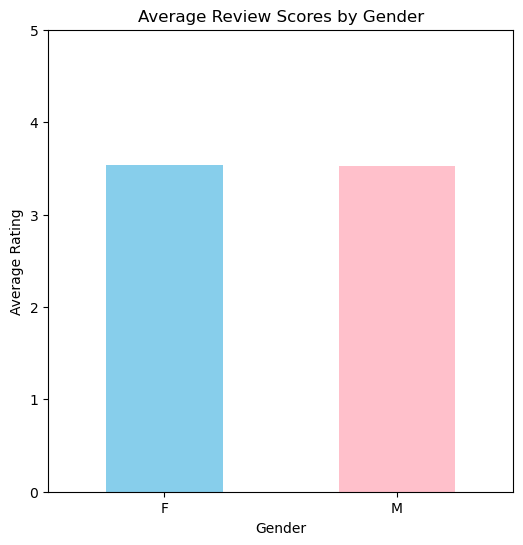

In [49]:
import matplotlib.pyplot as plt

# Calculate the average review scores by gender
average_scores_by_gender = movielens.groupby('sex')['rating'].mean()
print(average_scores_by_gender)

# Create a bar plot to compare the average scores
plt.figure(figsize=(6, 6))
average_scores_by_gender.plot(kind='bar', color=['skyblue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.title('Average Review Scores by Gender')
plt.xticks(rotation=0)
plt.ylim(0, 5)  # Set the y-axis limit to the range of ratings (0-5)
plt.show()


It's not clear enough...

To compare the average ratings given by males and females for different review scores, we can create a grouped bar plot where each bar represents a review score, and the heights of the bars represent the average ratings. 

<Figure size 1000x600 with 0 Axes>

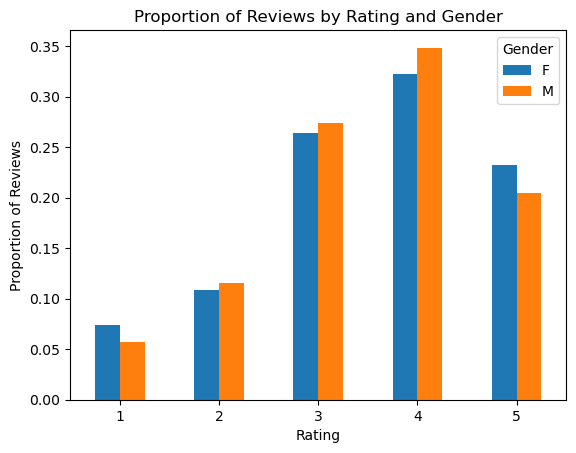

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average ratings by gender and review score
average_ratings_by_gender_score = movielens.groupby(['rating', 'sex'])['rating'].count().unstack('sex').fillna(0)
average_ratings_by_gender_score['M'] = average_ratings_by_gender_score['M'] / average_ratings_by_gender_score['M'].sum()
average_ratings_by_gender_score['F'] = average_ratings_by_gender_score['F'] / average_ratings_by_gender_score['F'].sum()

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
average_ratings_by_gender_score.plot(kind='bar', stacked=False)
plt.xlabel('Rating')
plt.ylabel('Proportion of Reviews')
plt.title('Proportion of Reviews by Rating and Gender')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


On which days of the week people tend to give higher/lower scores? Do you spot any interesting interaction with an additional feature?

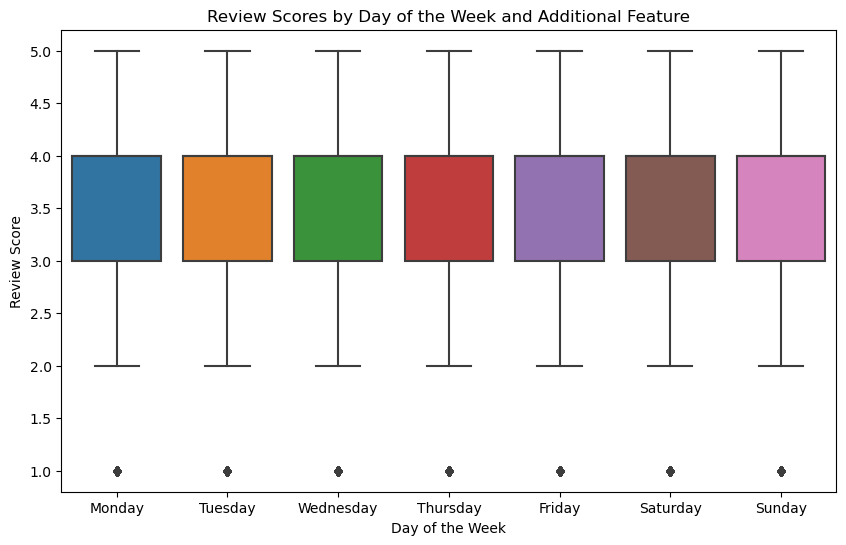

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to analyze review scores by day of the week and additional feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=movielens, x='day_of_week',order=day_order, y='rating')
plt.xlabel('Day of the Week')
plt.ylabel('Review Score')
plt.title('Review Scores by Day of the Week and Additional Feature')
plt.show()

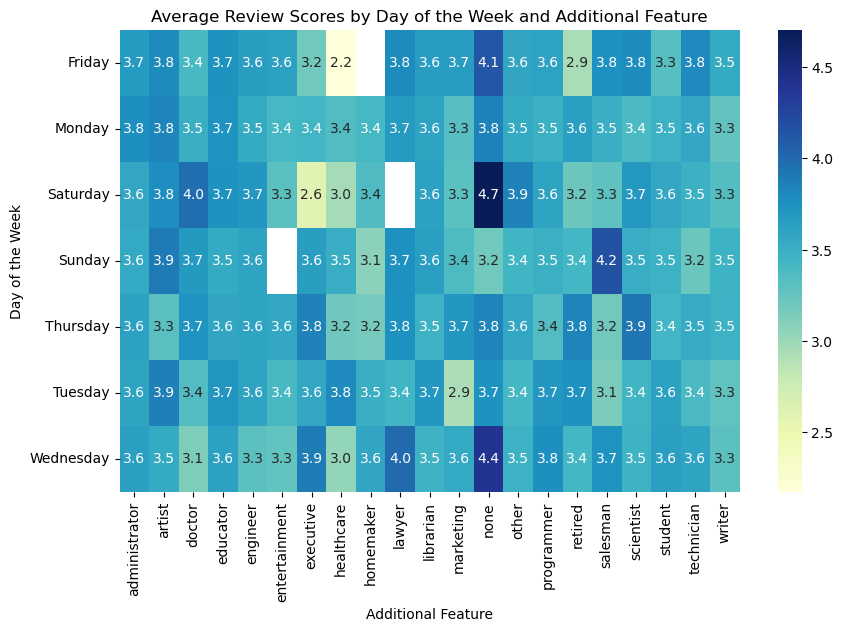

In [108]:
# Calculate the average review scores for each combination of variables
average_scores = movielens.pivot_table(index='day_of_week', columns='occupation', values='rating')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(average_scores, annot=True, cmap='YlGnBu', fmt='.1f', cbar=True)
plt.xlabel('Additional Feature')
plt.ylabel('Day of the Week')
plt.title('Average Review Scores by Day of the Week and Additional Feature')
plt.show()

I like this HeatMap. Men have a more stable mood throughout the week :))

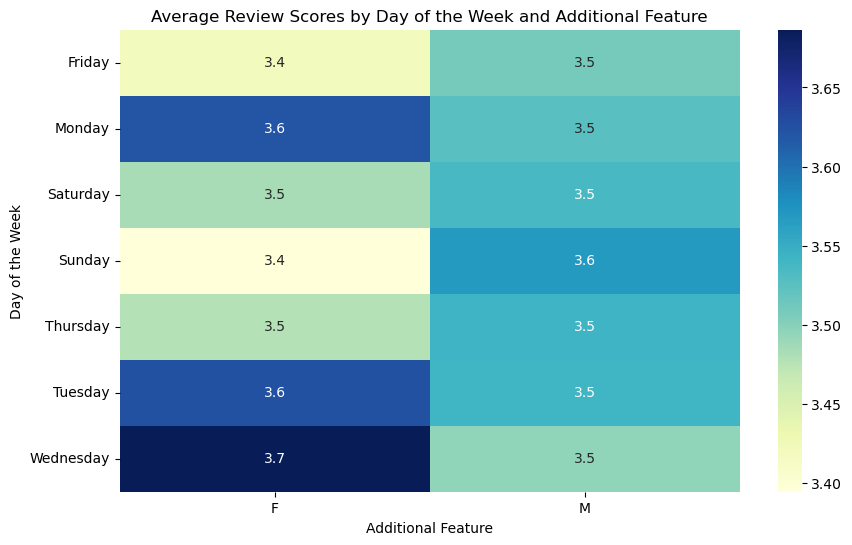

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average review scores for each combination of variables
average_scores = movielens.pivot_table(index='day_of_week', columns='sex', values='rating')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(average_scores, annot=True, cmap='YlGnBu', fmt='.1f', cbar=True)
plt.xlabel('Additional Feature')
plt.ylabel('Day of the Week')
plt.title('Average Review Scores by Day of the Week and Additional Feature')
plt.show()

Are there differences in the average review score for different days of the week, month, hours of the day, gender, occupation etc.?

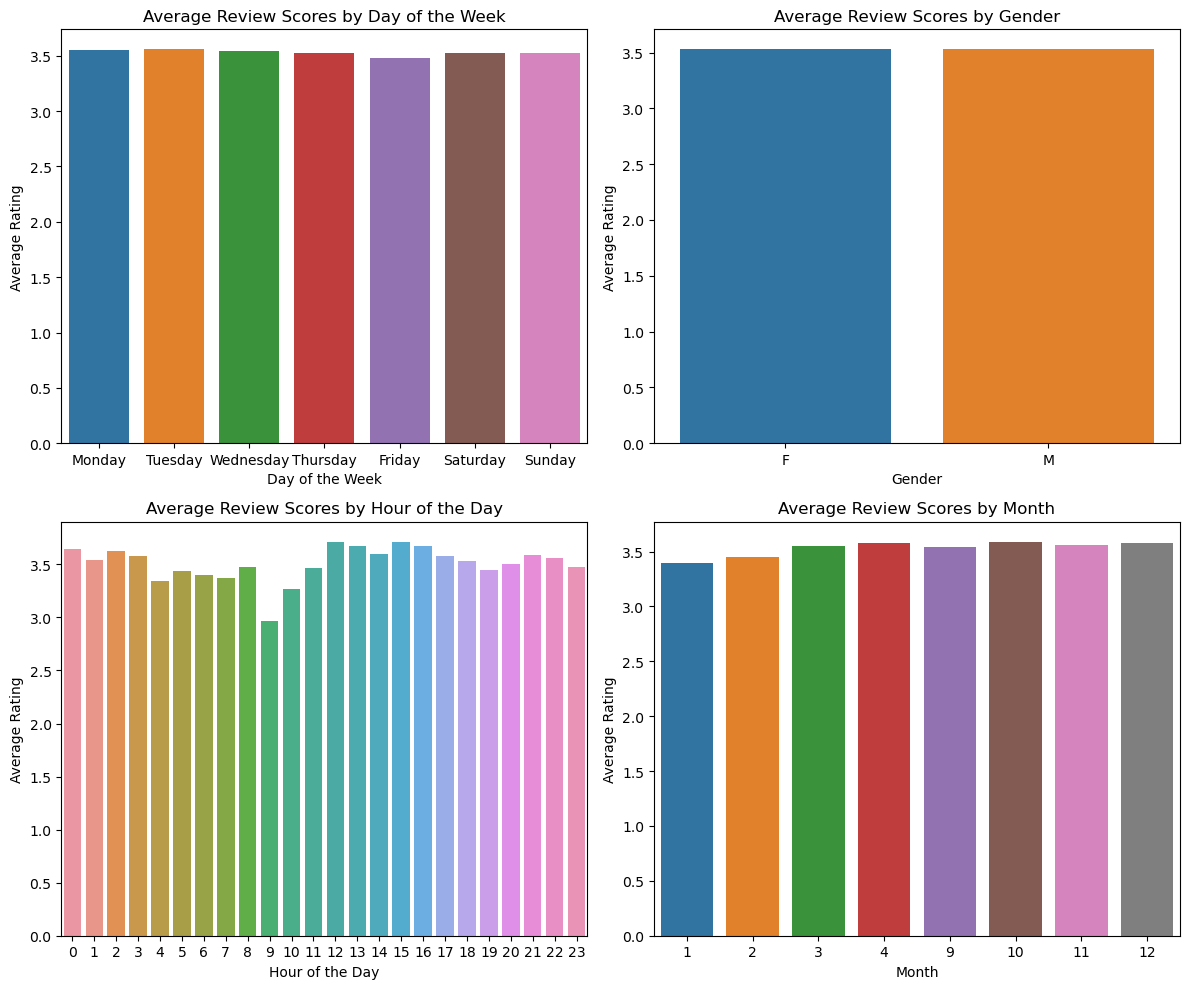

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for different factors
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Average review scores by day of the week
ax1 = axes[0, 0]
average_scores_by_day = movielens.groupby('day_of_week')['rating'].mean()
sns.barplot(x=average_scores_by_day_sorted.index, y=average_scores_by_day_sorted.values, ax=ax1, order=day_order)
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Rating')
ax1.set_title('Average Review Scores by Day of the Week')

# Average review scores by gender
ax2 = axes[0, 1]
average_scores_by_gender = movielens.groupby('sex')['rating'].mean()
sns.barplot(x=average_scores_by_gender_sorted.index, y=average_scores_by_gender_sorted.values, ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Average Rating')
ax2.set_title('Average Review Scores by Gender')

# Average review scores by hour of the day
ax3 = axes[1, 0]
average_scores_by_hour = movielens.groupby('hour')['rating'].mean()
sns.barplot(x=average_scores_by_hour_sorted.index, y=average_scores_by_hour_sorted.values, ax=ax3)
ax3.set_xlabel('Hour of the Day')
ax3.set_ylabel('Average Rating')
ax3.set_title('Average Review Scores by Hour of the Day')

# Average review scores by month
ax4 = axes[1, 1]
average_scores_by_month = movielens.groupby('month')['rating'].mean()
sns.barplot(x=average_scores_by_month_sorted.index, y=average_scores_by_month_sorted.values, ax=ax4)
ax4.set_xlabel('Month')
ax4.set_ylabel('Average Rating')
ax4.set_title('Average Review Scores by Month')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


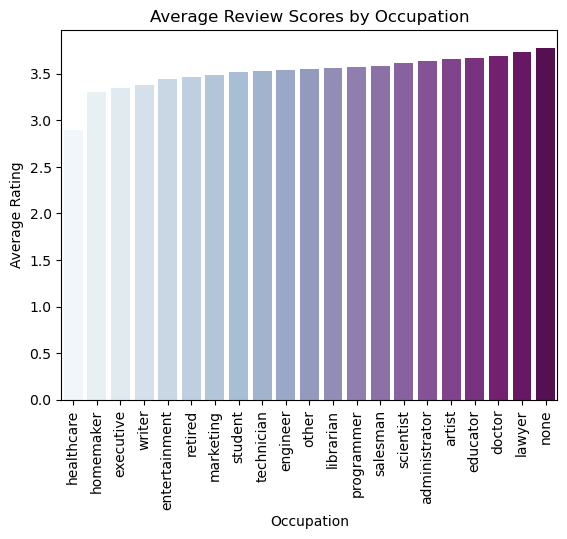

In [129]:
# Create subplots for different factor
average_scores_by_occupation = movielens.groupby('occupation')['rating'].mean().sort_values()
sns.barplot(x=average_scores_by_occupation.index, y=average_scores_by_occupation.values, palette='BuPu')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.title('Average Review Scores by Occupation')
plt.xticks(rotation=90)
# Show the plots
plt.show()

Do new movies get higher or lower review scores compared with movies that were released long time before the review?

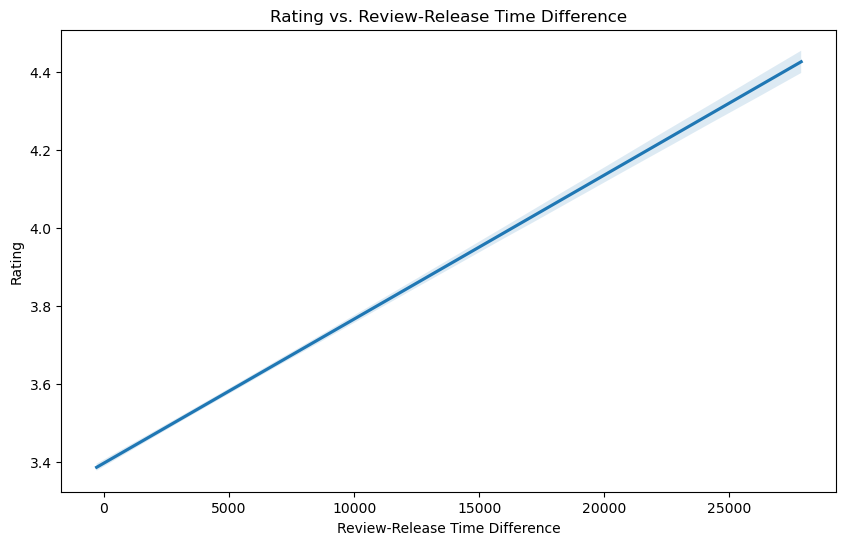

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the time difference between rating and release date in days
movielens['rating_release_diff'] = (movielens['time'] - movielens['release_date']).dt.days

# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='review_release_diff', y='rating', data=movielens, scatter=False)
plt.xlabel('Review-Release Time Difference')
plt.ylabel('Rating')
plt.title('Rating vs. Review-Release Time Difference')

plt.show()

We can look at good regression model should exhibit a linear relationship between the actual and predicted values. The points on the graph align closely to a diagonal line, indicating that the predictions are in line with the actual values.

Show the top "chick flicks" and "male movies" - i.e. movies liked much more by males or females.

In [151]:
# Calculate average ratings by movie and gender
avg_ratings = movielens.groupby(['title', 'sex'])['rating'].mean().unstack()

# Calculate the average rating difference between males and females
avg_ratings['rating_diff'] = avg_ratings['M'] - avg_ratings['F']

# Identify movies liked much more by males
male_preferred_movies = avg_ratings[avg_ratings['rating_diff'] > 0].nlargest(10, 'rating_diff')

# Identify movies liked much more by females
female_preferred_movies = avg_ratings[avg_ratings['rating_diff'] < 0].nsmallest(10, 'rating_diff')

# Print the movies liked much more by males
print("Movies Liked Much More by Males:\n")
print(male_preferred_movies[['M', 'F']])

# Print the movies liked much more by females
print("\nMovies Liked Much More by Females:\n")
print(female_preferred_movies[['M', 'F']])


Movies Liked Much More by Males:

sex                                                        M    F
title                                                            
Delta of Venus (1994)                               5.000000  1.0
Two or Three Things I Know About Her (1966)         4.666667  1.0
Paths of Glory (1957)                               4.419355  1.0
Magic Hour, The (1998)                              4.250000  1.0
Aparajito (1956)                                    4.000000  1.0
Killer (Bulletproof Heart) (1994)                   4.000000  1.0
Little City (1998)                                  5.000000  2.0
So Dear to My Heart (1949)                          4.000000  1.0
Spirits of the Dead (Tre passi nel delirio) (1968)  4.000000  1.0
Stalker (1979)                                      3.800000  1.0

Movies Liked Much More by Females:

sex                                           M    F
title                                               
Lay of the Land, The (1997)    

BONUS: Try to find other interesting patterns in the data.

<AxesSubplot:title={'center':'Top 20 rated movies'}, xlabel='title'>

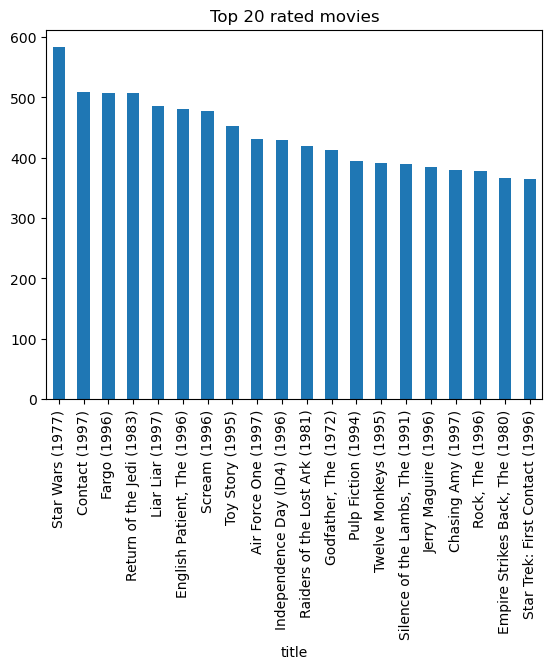

In [161]:
##top 25 rated movies
most_rated=movielens.groupby('title').size().sort_values(ascending=False)[:20]
most_rated.plot(kind="bar",title="Top 20 rated movies",label="count")

To find the top 5 most popular movies for each occupation, we can calculate the count of reviews for each movie within each occupation and then select the top 5 movies based on the highest count:

In [167]:
# Calculate the count of reviews for each movie within each occupation
reviews_by_movie_occupation = movielens.groupby(['movie_id', 'occupation'])['rating'].count().unstack()

# Get the top 5 movies for each occupation
top_movies_by_occupation = reviews_by_movie_occupation.apply(lambda x: x.nlargest(5).index.tolist(), axis=0)

# Reset the index of top_movies_by_occupation
top_movies_by_occupation = top_movies_by_occupation.reset_index()

# Create an empty DataFrame to store the unique movies for each occupation
unique_movies_by_occupation = pd.DataFrame(columns=['occupation', 'title'])

# Iterate over the occupations and retrieve the unique movies
for occupation in top_movies_by_occupation.columns[1:]:
    top_movies = top_movies_by_occupation[occupation]
    unique_movies = movies[movies['movie_id'].isin(top_movies)]
    unique_movies['occupation'] = occupation
    unique_movies_by_occupation = unique_movies_by_occupation.append(unique_movies[['occupation', 'title']])

# Print the unique movies for each occupation
for occupation in unique_movies_by_occupation['occupation'].unique():
    print(f"Unique movies for occupation: {occupation}")
    occupation_movies = unique_movies_by_occupation[unique_movies_by_occupation['occupation'] == occupation]
    print(occupation_movies)
    print()


Unique movies for occupation: administrator
        occupation                        title
49   administrator             Star Wars (1977)
180  administrator    Return of the Jedi (1983)
236  administrator         Jerry Maguire (1996)
257  administrator               Contact (1997)
285  administrator  English Patient, The (1996)

Unique movies for occupation: artist
    occupation                      title
49      artist           Star Wars (1977)
99      artist               Fargo (1996)
180     artist  Return of the Jedi (1983)
257     artist             Contact (1997)
293     artist           Liar Liar (1997)

Unique movies for occupation: doctor
    occupation                        title
0       doctor             Toy Story (1995)
99      doctor                 Fargo (1996)
285     doctor  English Patient, The (1996)
299     doctor         Air Force One (1997)
312     doctor               Titanic (1997)

Unique movies for occupation: educator
    occupation                      

C:\Users\bromotdi\AppData\Local\Temp\ipykernel_2212\2314404911.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_movies['occupation'] = occupation
C:\Users\bromotdi\AppData\Local\Temp\ipykernel_2212\2314404911.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_movies_by_occupation = unique_movies_by_occupation.append(unique_movies[['occupation', 'title']])
C:\Users\bromotdi\AppData\Local\Temp\ipykernel_2212\2314404911.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

#### Popular movies throughout the week

In [194]:
# Calculate the number of views per movie and day of week
views_per_movie_day_of_week = movielens.groupby(['movie_id', 'day_of_week'])['id'].count().unstack()

# Get the most viewed movie for each day of week
top_movies_by_day_of_week = views_per_movie_day_of_week.idxmax()

# Give a name to the Series
top_movies_by_day_of_week.name = 'movie_id'

# Merge with the movies DataFrame to get movie titles
top_movies_by_day_of_week = pd.merge(top_movies_by_day_of_week, movies[['movie_id', 'title']], left_on='movie_id', right_on='movie_id')
print(top_movies_by_day_of_week)

   movie_id                        title
0        50             Star Wars (1977)
1        50             Star Wars (1977)
2        50             Star Wars (1977)
3        50             Star Wars (1977)
4        50             Star Wars (1977)
5        50             Star Wars (1977)
6       286  English Patient, The (1996)


People review the Star Wars (1977) every day of the week except Sunday. Sunday is time for Romance/Drama (The English Patient(1996)) 

## Modeling
In this section, you'll train a ML model to predict the review score of different users. We'll treat this as a Classification task with 5 classes (review score of 1-5). You will need to perform feature engineering and come up with useful features that will allow you to build a successful model.

Use the file `u1.base` for training and the file `u1.test` for testing. Make sure you don't introduce any leakage and don't use any data from the test set during model creation. 

We'll first start with a very basic model. We'll use Logistic Regression with the following features:
- Average rating of the user
- Gender of the user
- Occupation of the user
- Age of the user
- Average rating in the zip code of the user
- Genres of the movie
- Year of the movie
- Month the movie was released


In [520]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

import os

def preprocessing_data(base_file, item_file, user_file):
    # Read all columns except the columns: 'title', 'video_release_date', 'imdb_url'
    m_cols = ['movie_id', 'release_date', 'unknown', 'Action', 'Adventure', 'Animation',
              'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
              'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
    # Read all columns except the column: 'timestamp'
    r_cols = ['user_id', 'movie_id', 'rating']
    movies = pd.read_csv(os.path.join('ml-100k', item_file), encoding='ISO-8859-1', sep='|', 
                         names=m_cols, usecols=[0, 2] + list(range(5, 24)))
    users = pd.read_csv(os.path.join('ml-100k', user_file), sep='|', names=u_cols)
    ratings = pd.read_csv(os.path.join('ml-100k', base_file), sep='\t', names=r_cols, usecols=range(3))

    movielens = pd.merge(users, ratings)
    movielens = pd.merge(movielens, movies)
    
    # Feature engineering
    # Average rating of the user
    movielens['average_rating_user'] = movielens.groupby(['user_id'])['rating'].transform(np.mean)
    # Average rating in the zip code of the user
    movielens['average_rating_zipcode'] = movielens.groupby(['zip_code'])['rating'].transform(np.mean)
    movielens.drop('zip_code', axis=1, inplace=True)
    # Remove NaN values (from 'release_date')
    movielens.dropna(inplace=True)
    movielens['year'] = pd.to_datetime(movielens['release_date']).dt.year
    movielens['month'] = pd.to_datetime(movielens['release_date']).dt.month
    movielens.drop(['user_id', 'movie_id', 'release_date'], axis=1, inplace=True)
    movielens = pd.get_dummies(movielens,columns=['gender'])
    # Handle categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('one_hot_encoder', OneHotEncoder(categories='auto', drop='first'), ['occupation'])
        ], remainder='passthrough'  # Leave the rest of the columns untouched
    )
    
    X = pd.DataFrame(preprocessor.fit_transform(movielens.loc[:, ~movielens.columns.isin(['rating'])]), columns=preprocessor.get_feature_names())
     
    y = movielens['rating']
    return X, y

X_train_raw, y_train = preprocessing_data('u1.base', 'u.item', 'u.user')
X_test_raw, y_test = preprocessing_data('u1.test', 'u.item', 'u.user')

C:\Users\bromotdi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\bromotdi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [521]:
# Get the current column names
column_names = X_train_raw.columns.tolist()

# Edit the column names
new_column_names = [name.replace("one_hot_encoder__x0_", "") for name in column_names]

# Assign the new column names to the DataFrame
X_train_raw.columns = new_column_names

# Display the updated DataFrame
X_train_raw.head()

,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,...,Sci-Fi,Thriller,War,Western,average_rating_user,average_rating_zipcode,year,month,gender_F,gender_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.681481,3.762821,1995.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.800000,3.726027,1995.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.581818,3.581818,1995.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.136729,3.136729,1995.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.347826,4.347826,1995.0,1.0,0.0,1.0


In [522]:
X_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79997 entries, 0 to 79996
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artist                  79997 non-null  float64
 1   doctor                  79997 non-null  float64
 2   educator                79997 non-null  float64
 3   engineer                79997 non-null  float64
 4   entertainment           79997 non-null  float64
 5   executive               79997 non-null  float64
 6   healthcare              79997 non-null  float64
 7   homemaker               79997 non-null  float64
 8   lawyer                  79997 non-null  float64
 9   librarian               79997 non-null  float64
 10  marketing               79997 non-null  float64
 11  none                    79997 non-null  float64
 12  other                   79997 non-null  float64
 13  programmer              79997 non-null  float64
 14  retired                 79997 non-null

In [523]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.fit_transform(X_test_raw)
X_train

array([[-0.15, -0.07, -0.32, ..., -0.53, -0.59,  0.59],
       [-0.15, -0.07, -0.32, ..., -0.53,  1.68, -1.68],
       [-0.15, -0.07, -0.32, ..., -0.53, -0.59,  0.59],
       ...,
       [-0.15, -0.07, -0.32, ..., -0.53, -0.59,  0.59],
       [-0.15, -0.07, -0.32, ..., -0.53, -0.59,  0.59],
       [-0.15, -0.07, -0.32, ...,  0.11, -0.59,  0.59]])

In [524]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Set the precision of floating-point numbers to 2 decimal places
np.set_printoptions(precision=2)

# Define the logistic regression model
logreg = LogisticRegression(max_iter=100000, solver='lbfgs', multi_class='ovr')

# Define the hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_logreg = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
best_logreg.fit(X_train, y_train)

# Make predictions on the test set
predictions_test = best_logreg.predict(X_test)
proba_test = best_logreg.predict_proba(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions_test)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Accuracy: 0.3934180254076223
Best Hyperparameters: {'C': 10}


Display the confusion matrix. Analyze the results.

In [525]:
confusion_matrix_data = confusion_matrix(y_test, predictions_test)

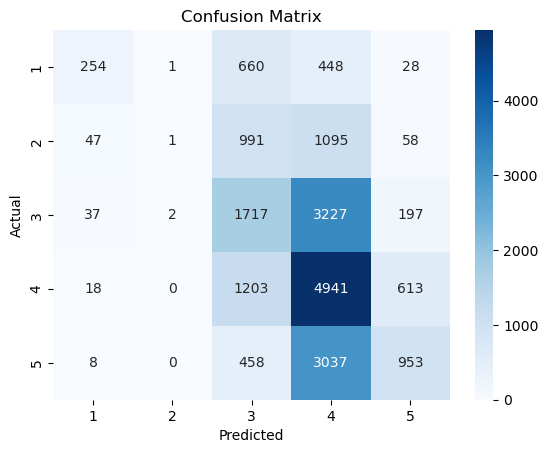

In [526]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Labels for the classes/categories
class_labels = ["1", "2", "3", "4", "5"]

# Plotting the confusion matrix
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


Analyzing the results:

1. The diagonal elements (top-left to bottom-right) of the confusion matrix represent the correctly predicted instances for each class. For example, the value 1717 in the cell corresponding to "3" represents the number of instances correctly predicted as "3"
2. Off-diagonal elements indicate the misclassifications. For example, the value 660 in the cell corresponding to "1" and "3" indicates that 660 instances of "1" were incorrectly classified as "3"
3. The higher the values on the diagonal (TP), the better the model's performance in correctly predicting the respective class.
4. The lower off-diagonal values (FP and FN) indicate fewer misclassifications.
5. It is important to consider the relative proportions of different classes to understand the significance of the values in the confusion matrix.

Display the classification report. Discuss the results.

In [527]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           1       0.70      0.18      0.29      1391
           2       0.25      0.00      0.00      2192
           3       0.34      0.33      0.34      5180
           4       0.39      0.73      0.51      6775
           5       0.52      0.21      0.30      4456

    accuracy                           0.39     19994
   macro avg       0.44      0.29      0.29     19994
weighted avg       0.41      0.39      0.35     19994



The provided classification report shows the performance metrics of a classification model. Here's the interpretation of the metrics:

- Precision: Precision is the ratio of true positive predictions to the total predicted positives. It measures how accurately the model predicts positive instances. In this case, the precision values for each class are as follows:
  - Class 1: 0.70 (70% of the instances predicted as class 1 are actually class 1)
  - Class 2: 0.25 (25% of the instances predicted as class 2 are actually class 2)
  - Class 3: 0.34 (34% of the instances predicted as class 3 are actually class 3)
  - Class 4: 0.39 (39% of the instances predicted as class 4 are actually class 4)
  - Class 5: 0.52 (52% of the instances predicted as class 5 are actually class 5)

- Recall: Recall is the ratio of true positive predictions to the total actual positives. It measures the model's ability to correctly identify positive instances. The recall values for each class are as follows:
  - Class 1: 0.18 (18% of the actual class 1 instances are correctly predicted)
  - Class 2: 0.00 (0% of the actual class 2 instances are correctly predicted)
  - Class 3: 0.33 (33% of the actual class 3 instances are correctly predicted)
  - Class 4: 0.73 (73% of the actual class 4 instances are correctly predicted)
  - Class 5: 0.21 (21% of the actual class 5 instances are correctly predicted)

- F1-score: F1-score is the harmonic mean of precision and recall. It provides a single metric that combines both precision and recall. The F1-score values for each class are as follows:
  - Class 1: 0.29
  - Class 2: 0.00
  - Class 3: 0.34
  - Class 4: 0.51
  - Class 5: 0.30

- Support: Support indicates the number of instances of each class in the dataset.

- Accuracy: Accuracy is the overall correctness of the model's predictions. It is the ratio of correct predictions to the total number of instances. In this case, the overall accuracy of the model is 0.39, indicating that approximately 39% of the instances are predicted correctly.

- Macro Average: Macro average calculates the average performance across all classes, giving equal weight to each class. The macro average F1-score is 0.29.

- Weighted Average: Weighted average calculates the average performance across all classes, considering the support (number of instances) of each class. The weighted average F1-score is 0.35.

Overall, the classification report provides insights into the model's performance for each class and overall accuracy. It shows that the model performs better for some classes (e.g., class 4) compared to others (e.g., class 2), and the overall performance is moderate with room for improvement.

Is your model overfitting?

In [528]:
# Make predictions on the training set
predictions_train = best_logreg.predict(X_train)

# Calculate the classification report
classification_report_train = classification_report(y_train, predictions_train)
print("Classification Report (Training):\n", classification_report_train)

Classification Report (Training):
               precision    recall  f1-score   support

           1       0.63      0.13      0.22      4718
           2       0.42      0.00      0.00      9178
           3       0.36      0.35      0.35     21962
           4       0.39      0.71      0.50     27395
           5       0.50      0.23      0.31     16744

    accuracy                           0.40     79997
   macro avg       0.46      0.29      0.28     79997
weighted avg       0.42      0.40      0.35     79997



In [529]:
# Calculate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.3934180254076223


Plot the ROC curve and compute the AUC.

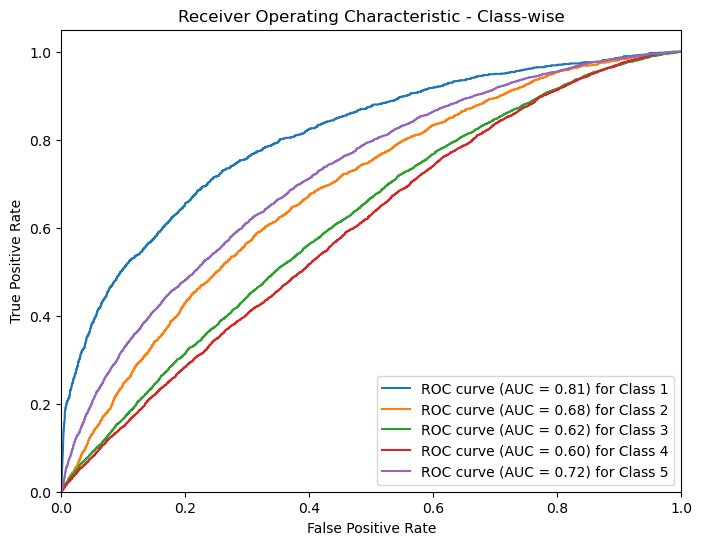

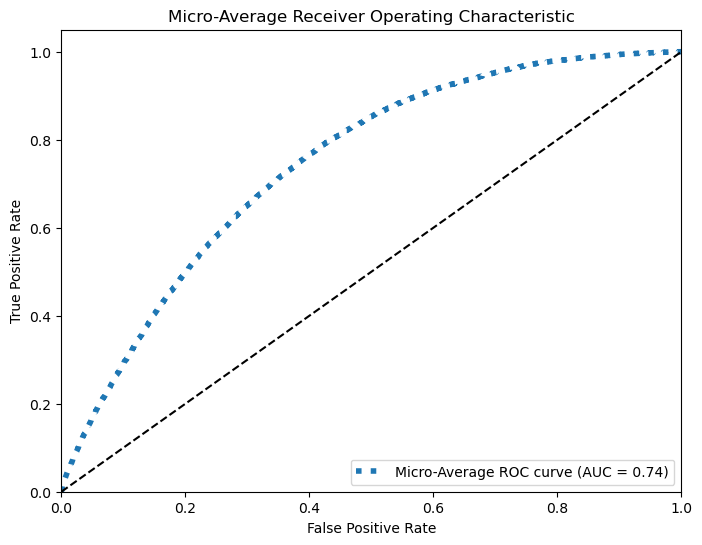

AUC for Class 1: 0.81
AUC for Class 2: 0.68
AUC for Class 3: 0.62
AUC for Class 4: 0.60
AUC for Class 5: 0.72
Micro-Average AUC: 0.74


In [530]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_binarized.shape[1]

# Compute the probabilities for each class
proba_classes = proba_test[:, :n_classes]

# Compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], proba_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), proba_classes.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = {:.2f}) for Class {}'.format(roc_auc[i], i+1))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc='lower right')
plt.show()

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label='Micro-Average ROC curve (AUC = {:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the ROC AUC for each class
for i in range(n_classes):
    print("AUC for Class {}: {:.2f}".format(i+1, roc_auc[i]))

# Print the micro-average ROC AUC
print("Micro-Average AUC: {:.2f}".format(roc_auc_micro))


- AUC for Class 1: The AUC for Class 1 is 0.81. It indicates the overall performance of the model in distinguishing positive instances of Class 1 from negative instances. A higher AUC suggests that the model has a better ability to correctly rank positive Class 1 instances higher than negative instances.

- AUC for Class 2: The AUC for Class 2 is 0.68. It represents the model's performance in distinguishing positive instances of Class 2 from negative instances. A higher AUC value indicates better discrimination between the positive and negative instances of Class 2.

- AUC for Class 3: The AUC for Class 3 is 0.62. It shows the model's ability to differentiate positive instances of Class 3 from negative instances. A higher AUC value suggests better performance in classifying Class 3 instances.

- AUC for Class 4: The AUC for Class 4 is 0.60. It represents the model's performance in distinguishing positive instances of Class 4 from negative instances. A higher AUC value indicates better discrimination between the positive and negative instances of Class 4.

- AUC for Class 5: The AUC for Class 5 is 0.72. It shows the model's ability to differentiate positive instances of Class 5 from negative instances. A higher AUC value suggests better performance in classifying Class 5 instances.

- Micro-Average AUC: The micro-average AUC is 0.74. It calculates the overall AUC by considering the aggregate performance of all classes. It gives equal weight to each instance and classifies them collectively. A higher micro-average AUC indicates better overall discrimination between positive and negative instances across all classes.

Plot the Precision-Recall curve.

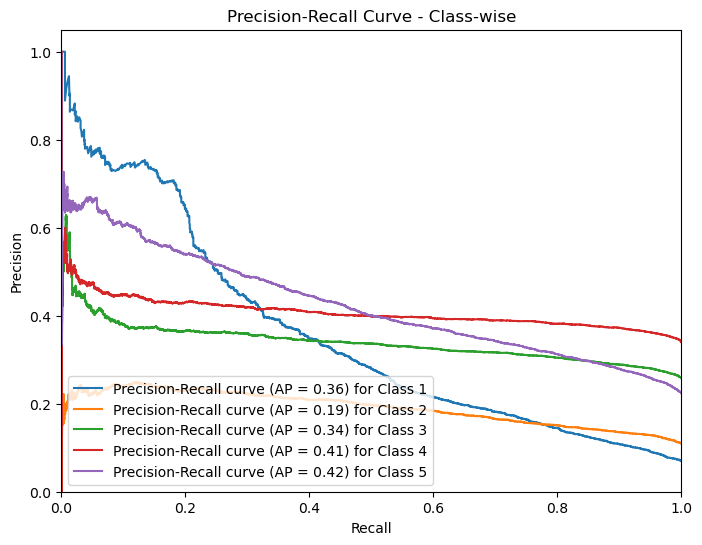

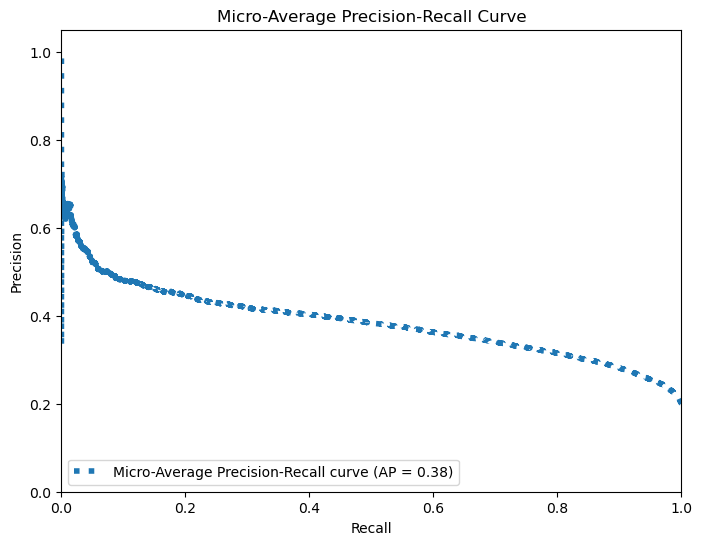

Average Precision for Class 1: 0.36
Average Precision for Class 2: 0.19
Average Precision for Class 3: 0.34
Average Precision for Class 4: 0.41
Average Precision for Class 5: 0.42
Micro-Average Average Precision: 0.38


In [531]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute the precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], proba_classes[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], proba_classes[:, i])

# Compute micro-average precision and recall
precision_micro, recall_micro, _ = precision_recall_curve(y_test_binarized.ravel(), proba_classes.ravel())
average_precision_micro = average_precision_score(y_test_binarized.ravel(), proba_classes.ravel())

# Plot the precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='Precision-Recall curve (AP = {:.2f}) for Class {}'.format(average_precision[i], i+1))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Class-wise')
plt.legend(loc='lower left')
plt.show()

# Plot the micro-average precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_micro, precision_micro, label='Micro-Average Precision-Recall curve (AP = {:.2f})'.format(average_precision_micro), linestyle=':', linewidth=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Average Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Print the average precision for each class
for i in range(n_classes):
    print("Average Precision for Class {}: {:.2f}".format(i+1, average_precision[i]))

# Print the micro-average average precision
print("Micro-Average Average Precision: {:.2f}".format(average_precision_micro))


- Average Precision for Class 1: The Average Precision for Class 1 is 0.36. It measures the average precision of the model in classifying positive instances of Class 1. A higher Average Precision suggests that the model achieves a higher proportion of true positive predictions for Class 1 while minimizing false positives.

- Average Precision for Class 2: The Average Precision for Class 2 is 0.19. It represents the average precision of the model in classifying positive instances of Class 2. A higher Average Precision value indicates a better trade-off between true positive and false positive predictions for Class 2.

- Average Precision for Class 3: The Average Precision for Class 3 is 0.34. It shows the average precision of the model in classifying positive instances of Class 3. A higher Average Precision value suggests better precision in predicting true positives for Class 3 while minimizing false positives.

- Average Precision for Class 4: The Average Precision for Class 4 is 0.41. It represents the average precision of the model in classifying positive instances of Class 4. A higher Average Precision value indicates a better balance between true positive and false positive predictions for Class 4.

- Average Precision for Class 5: The Average Precision for Class 5 is 0.42. It shows the average precision of the model in classifying positive instances of Class 5. A higher Average Precision value suggests better precision in predicting true positives for Class 5 while minimizing false positives.

- Micro-Average Average Precision: The micro-average Average Precision is 0.38. It calculates the overall average precision by considering the aggregate performance of all classes. It gives equal weight to each instance and classifies them collectively. A higher micro-average Average Precision indicates better overall precision in predicting positive instances across all classes.

**Plot the confidence-performance graph. In this graph, the X axis is the probability of the predicted class (the max probability), grouped into ~10 groups, and the Y axis is the average accuracy of each group.  
Why is this graph important? How can it help us?**

The confidence-performance graph, also known as the reliability diagram or calibration curve, is important in assessing the calibration or reliability of a classification model's predictions. It helps us understand the relationship between the predicted probabilities and the accuracy of the model's predictions.

The graph is created by grouping the predicted probabilities into approximately 10 groups or bins, and then calculating the average accuracy of the predictions within each bin. The x-axis represents the probability range, typically from 0 to 1, while the y-axis represents the average accuracy.

The graph is important for the following reasons:

1. Calibration Assessment: The graph allows us to visually inspect how well the predicted probabilities align with the actual accuracy of the predictions. A well-calibrated model will have a graph where the average accuracy is close to the predicted probabilities. If there are deviations, it indicates a lack of calibration.

2. Confidence Estimation: The graph helps us understand the reliability of the model's confidence estimates. Ideally, when the model predicts higher probabilities for a particular class, the average accuracy within that probability range should also be high. If there are discrepancies, it indicates that the model may be overconfident or underconfident in its predictions.

3. Decision Threshold Selection: The graph can aid in choosing an appropriate decision threshold for classification. By analyzing the relationship between predicted probabilities and average accuracy, we can determine the threshold that balances precision and recall or minimize the misclassification rate.

4. Model Comparison: The graph can be used to compare the calibration of different models. Models with similar confidence-performance curves are considered equally calibrated, while deviations can indicate differences in reliability.

C:\Users\bromotdi\AppData\Local\Temp\ipykernel_12636\3388811710.py:15: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  mean_corrected = predicted_class.groupby(bins).apply(lambda x: (x['predicted_class'] == x['real_class']).mean())


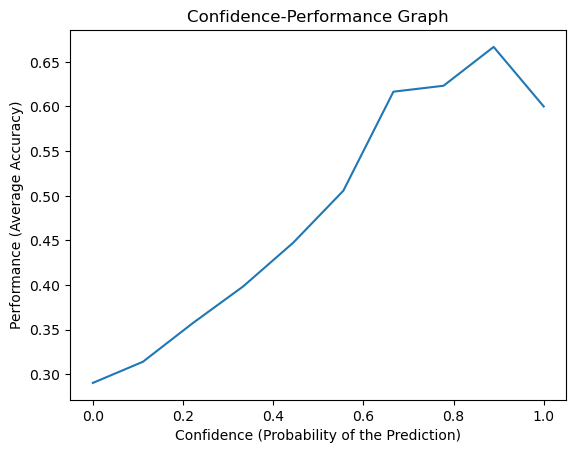

In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with predicted and real classes
predicted_class = pd.DataFrame({'predicted_class': predictions_test, 'real_class': y_test})

# Calculate the maximum predicted probability for each data point
max_probabilities = proba_test.max(axis=1)

# Group the data into approximately 10 groups based on the max_probabilities
bins = pd.cut(max_probabilities, bins=10, labels=np.linspace(0, 1, 10))

# Calculate the mean accuracy for each group
mean_corrected = predicted_class.groupby(bins).apply(lambda x: (x['predicted_class'] == x['real_class']).mean())

# Plot the confidence-performance graph
plt.plot(mean_corrected)
plt.xlabel('Confidence (Probability of the Prediction)')
plt.ylabel('Performance (Average Accuracy)')
plt.title('Confidence-Performance Graph')
plt.show()

What are the most important features? Do they fit your intuition?

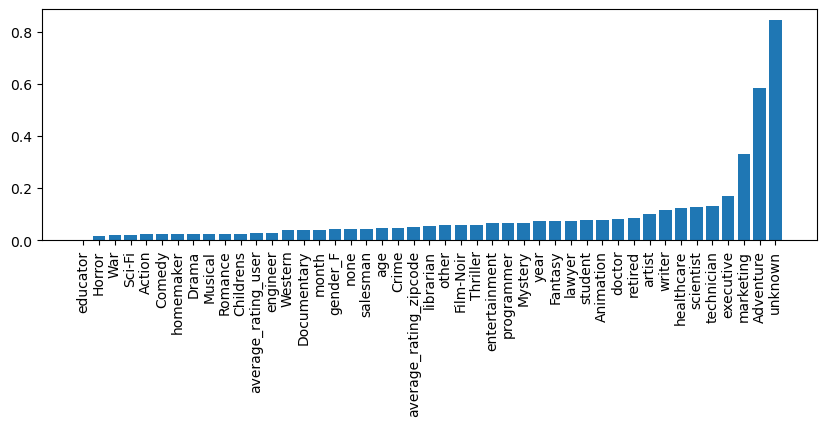

In [533]:
# Higher the absolute value of a feature weight, more is its importance.
important_features = np.argsort(np.max(np.abs(clf.coef_), axis=0))
names = X_train_raw.columns[important_features]
plt.figure(figsize=(10,3))
plt.bar(names, np.sort(np.max(np.abs(clf.coef_), axis=0)))
plt.xticks(rotation=90);

**Error analysis - try to find features that your model uses that indicate errors of your model.**

To identify the parameters in the code that might negatively impact the model's performance, we need to consider potential issues or areas that could lead to poorer results. Here are a few aspects that might impact the model's performance:

1. Data Leakage: The preprocessing steps might introduce data leakage if information from the test set is used during the preprocessing of the training set. This could lead to overly optimistic performance estimates during training and poor generalization to unseen data. However, in the provided code, there doesn't seem to be explicit data leakage.

2. Handling Categorical Variables: The code uses one-hot encoding to handle categorical variables such as 'gender' and 'occupation'. While one-hot encoding is a common approach, it can increase the dimensionality of the feature space significantly, especially for categorical variables with high cardinality. This might result in a more complex model and potentially overfitting if not properly managed.

3. Feature Engineering: The code performs feature engineering by creating new features like 'average_rating_user' and 'average_rating_zipcode'. While feature engineering can improve model performance, it's crucial to ensure that these engineered features are genuinely informative and not causing overfitting or introducing noise to the data.

4. Missing Data: The code drops rows with missing values using the `dropna()` function. Depending on the amount and nature of missing data, this approach might lead to a loss of valuable information. It's important to understand the reason for missing values and consider alternative strategies such as imputation if appropriate.

5. Scaling: There is no explicit scaling of the numerical features in the provided code. Depending on the specific machine learning algorithm used, scaling the numerical features might be necessary to ensure their values are on a similar scale. Failing to scale features could lead to biased models or issues during optimization.

Try change Handling Categorical Variables situation:

In [535]:
# List of columns to keep
columns_to_keep = ['age', 'gender_F', 'gender_M', 'average_rating_user']

# Select only the desired columns in the DataFrame
X_test_raw = X_test_raw[columns_to_keep]
X_train_raw = X_train_raw[columns_to_keep]

In [536]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.fit_transform(X_test_raw)
X_train

array([[-0.76, -0.59,  0.59,  0.34],
       [ 1.74,  1.68, -1.68,  0.61],
       [ 0.79, -0.59,  0.59,  0.12],
       ...,
       [-0.16, -0.59,  0.59, -0.07],
       [-0.42, -0.59,  0.59, -1.22],
       [-0.5 , -0.59,  0.59, -0.36]])

In [537]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Set the precision of floating-point numbers to 2 decimal places
np.set_printoptions(precision=2)

# Define the logistic regression model
logreg = LogisticRegression(max_iter=100000, solver='lbfgs', multi_class='ovr')

# Define the hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_logreg = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
best_logreg.fit(X_train, y_train)

# Make predictions on the test set
predictions_test = best_logreg.predict(X_test)
proba_test = best_logreg.predict_proba(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions_test)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Accuracy: 0.38266479943983195
Best Hyperparameters: {'C': 1}


In [538]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           1       0.69      0.19      0.30      1391
           2       0.00      0.00      0.00      2192
           3       0.34      0.23      0.28      5180
           4       0.37      0.84      0.52      6775
           5       0.56      0.11      0.19      4456

    accuracy                           0.38     19994
   macro avg       0.39      0.28      0.26     19994
weighted avg       0.39      0.38      0.31     19994



C:\Users\bromotdi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bromotdi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bromotdi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see, reducing the number of input parameters doesn't save the situation 